In [240]:
import os

import numpy as np
import pandas as pd
from json import loads, dumps, load, dump

In [245]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [246]:
from IPython.display import display

def show_df(_df, _rows=20, _columns=12):
    with pd.option_context('display.max_rows', _rows, 'display.max_columns', _columns):
        display(_df[:_rows])

In [3]:
# global variables
data_dir = '/mnt/aly/workplace/bili_statics/data'

In [4]:
# load videos.json
for each in os.listdir(f'{data_dir}/infos'):
    print(each)

20220521
20220504
20220517
20220522
20220514
20220508
20220520
20220519
20220518
20220503
20220513
20220511
20220516
20220523
20220506
20220515
20220510
20220505
20220509
20220507
20220512


In [87]:
# init video_pds's video_index
dirs = os.listdir(f'{data_dir}/infos')
video_index = pd.DatetimeIndex(dirs)
video_index

DatetimeIndex(['2022-05-21', '2022-05-04', '2022-05-17', '2022-05-22',
               '2022-05-14', '2022-05-08', '2022-05-20', '2022-05-19',
               '2022-05-18', '2022-05-03', '2022-05-13', '2022-05-11',
               '2022-05-16', '2022-05-23', '2022-05-06', '2022-05-15',
               '2022-05-10', '2022-05-05', '2022-05-09', '2022-05-07',
               '2022-05-12'],
              dtype='datetime64[ns]', freq=None)

In [113]:
# init video_pds's columns
video_columns = ['aid', 'bvid', 'comment', 'typeid', 'play', 'description', 'title', 'author', 'mid', 'created', 'length', 'video_review']

In [89]:
# init a video_pds which is a DataFrame stores all video of info
videos_pd = pd.DataFrame(columns=video_columns)
del videos_pd['aid']
videos_pd.index.name = 'aid'
videos_pd

,bvid,comment,typeid,play,description,title,author,mid,created,length,video_review
aid,,,,,,,,,,,


In [106]:
# download all videos.json to memory (spend long time)
video_jsons = []
for each in os.listdir(f'{data_dir}/infos'):
    with open(f'{data_dir}/infos/{each}/videos.json') as f:
        video_jsons.append(load(f))

In [117]:
video_pds = []

In [118]:
for video_json, _date in zip(video_jsons, video_index):
    video_pd = pd.DataFrame(video_json, columns=video_columns)
    video_pd.index = video_pd['aid']
    del video_pd['aid']
    video_pds.append(video_pd)

In [121]:
videos_pd = pd.concat(video_pds, keys=video_index)

In [351]:
# show_df(videos_pd.sort_index(level=0), 250)
videos_pd = videos_pd.sort_index(level=0)
videos_pd

bvid  comment  typeid     play  \
           aid                                                 
2022-05-03 54916636   BV1P4411T73c    37499      65  3926326   
           61616393   BV1P4411T73c    15516      65  1843317   
           79863637   BV1P4411T73c     5688      65  3143630   
           83275598   BV1P4411T73c    13375      65  8114308   
           95549190   BV1P4411T73c     8094      65  1107457   
...                            ...      ...     ...      ...   
2022-05-23 974314686  BV1w44y1m79B    42919     172  7345677   
           975604735  BV1z44y1b7cQ    35216     172  4055210   
           975866859  BV1E44y1t7Kn    26455     172  5035077   
           976458431  BV1C44y1i7Rw     8216     172   958649   
           978442608  BV1V44y1s7FW    19146     172  1599463   

                                                            description  \
           aid                                                            
2022-05-03 54916636            维系者正在死去，创造者尚未到来。\n但世界不会再度灼烧，因为你将登上「神」之座。   
           61616393   告诉大家一个秘密，安柏我最近可是一直有在偷偷努力练习哦！什么？你问练习内容？当然是学习如何成...   
           79863637   「璃月七星」中的「天权」，对璃月每一寸土地的秘密了若指掌。\n然而海上有一位「无冕的龙王」，...   
           83275598   自蒙德向南而行，将抵达名为「璃月」的国度。七国最大的商港「璃月港」坐落海边。\n此地至今仍有...   
           95549190   旅行者！好久不见了，最近有好好锻炼身体，为新的冒险做准备吗？健康是完成挑战的首要条件，千万不...   
...                                                                 ...   
2022-05-23 974314686  绫华虽早已获授神里流太刀术皆传印可，却仍坚持修行，从未松懈。\n只是近日，家仆们纷纷发现，小...   
           975604735  天时地利不可多得，人和同心更弥足珍贵。\n云集众生之力，即使潜居深海的游鱼也可得见群星璀璨。...   
           975866859  自由宁静的蒙德城和富饶繁华的璃月港记录下每一位旅人的脚步。\n风之歌和岩之声在新的舞台上的交...   
           976458431  会被托马守护的事物有很多，比如信赖的挚友，熟识的同僚，和那些毛绒绒的小生灵。\n以及为了回报...   
           978442608  一座古城，聚日夜嚣市繁盛。\n千杯满月，照春秋浮光入梦。\n\nSun Rises in L...   

                                            title author        mid  \
           aid                                                        
2022-05-03 54916636               《原神》序章PV：捕风的异乡人     原神  401742377   
           61616393           《原神》跟着安柏一起探索提瓦特大陆吧！     原神  401742377   
           79863637           《原神》全新角色预告-「天星不照之处」     原神  401742377   
           83275598           《原神》新地区预告-「浮世浮生千岩间」     原神  401742377   
           95549190   《原神》「再临测试」前瞻，与安柏一同尽情观赏璃月风光！     原神  401742377   
...                                           ...    ...        ...   
2022-05-23 974314686         《原神》角色演示-「神里绫华：寒椿吹雪」     原神  401742377   
           975604735        《原神》角色演示-「珊瑚宫心海：千涛触月」     原神  401742377   
           975866859    《原神》线上音乐会2021———「无际之旅的旋律」     原神  401742377   
           976458431           《原神》拾枝杂谈-「托马：赤心红铠」     原神  401742377   
           978442608              《原神》EP - 闲情雅趣之悦     原神  401742377   

                         created  length  video_review  
           aid                                          
2022-05-03 54916636   1559964671   01:54         12602  
           61616393   1564657256   12:48          8085  
           79863637   1576814447   00:59          2202  
           83275598   1578985824   01:47          7482  
           95549190   1583985647   05:41          6413  
...                          ...     ...           ...  
2022-05-23 974314686  1626753614   09:54         75284  
           975604735  1632110419   07:25         24700  
           975866859  1633276811  103:58        102416  
           976458431  1635847203   05:31          4287  
           978442608  1643083218   05:30         35341  

[4017 rows x 11 columns]

In [392]:
show_df(videos_pd.loc[('2022-05-23', ), ]['bvid'] == 'BV1M5411S7Lg', 200)

aid
54916636     False
61616393     False
79863637     False
83275598     False
95549190     False
97103260     False
100664241    False
200021620    False
203981348    False
205334557    False
208352622    False
210378448    False
211364335    False
212720443    False
244819673    False
246234586    False
247346367    False
248366577    False
250023389    False
252219994    False
253853934    False
254589574    False
287111010    False
287558357    False
295092877    False
298290791    False
299201349    False
327518101    False
328490247    False
329131026    False
329862573    False
330747700    False
330825464    False
335648953    False
335756622    False
337174269    False
340093159    False
371704367    False
372168911    False
372618730    False
372661120    False
372989055    False
373709085    False
376526193    False
376569461    False
376632446    False
377156097    False
377988577    False
378013530    False
378053502    False
380088765    False
414554384    False
41785222

In [381]:
temp = videos_pd.loc[(slice(None), 299201349), :]
temp = temp['play']
temp

            aid      
2022-05-21  299201349    1729113
2022-05-22  299201349    2659782
2022-05-23  299201349    2980131
Name: play, dtype: int64

In [382]:
videos_pd.index.levels[1]

Int64Index([ 54916636,  61616393,  79863637,  83275598,  95549190,  97103260,
            100664241, 200021620, 203981348, 205334557,
            ...
            969847513, 970226821, 970746728, 971894158, 973263423, 974314686,
            975604735, 975866859, 976458431, 978442608],
           dtype='int64', name='aid', length=193)

In [386]:
videos_pd['play'].unstack()[299201349]

2022-05-03          NaN
2022-05-04          NaN
2022-05-05          NaN
2022-05-06          NaN
2022-05-07          NaN
                ...    
2022-05-19          NaN
2022-05-20          NaN
2022-05-21    1729113.0
2022-05-22    2659782.0
2022-05-23    2980131.0
Name: 299201349, Length: 21, dtype: float64

In [408]:
temp = videos_pd.index.levels[1]
temp2 = [640848701, 299201349, 468168491, 299201349]

<AxesSubplot:>

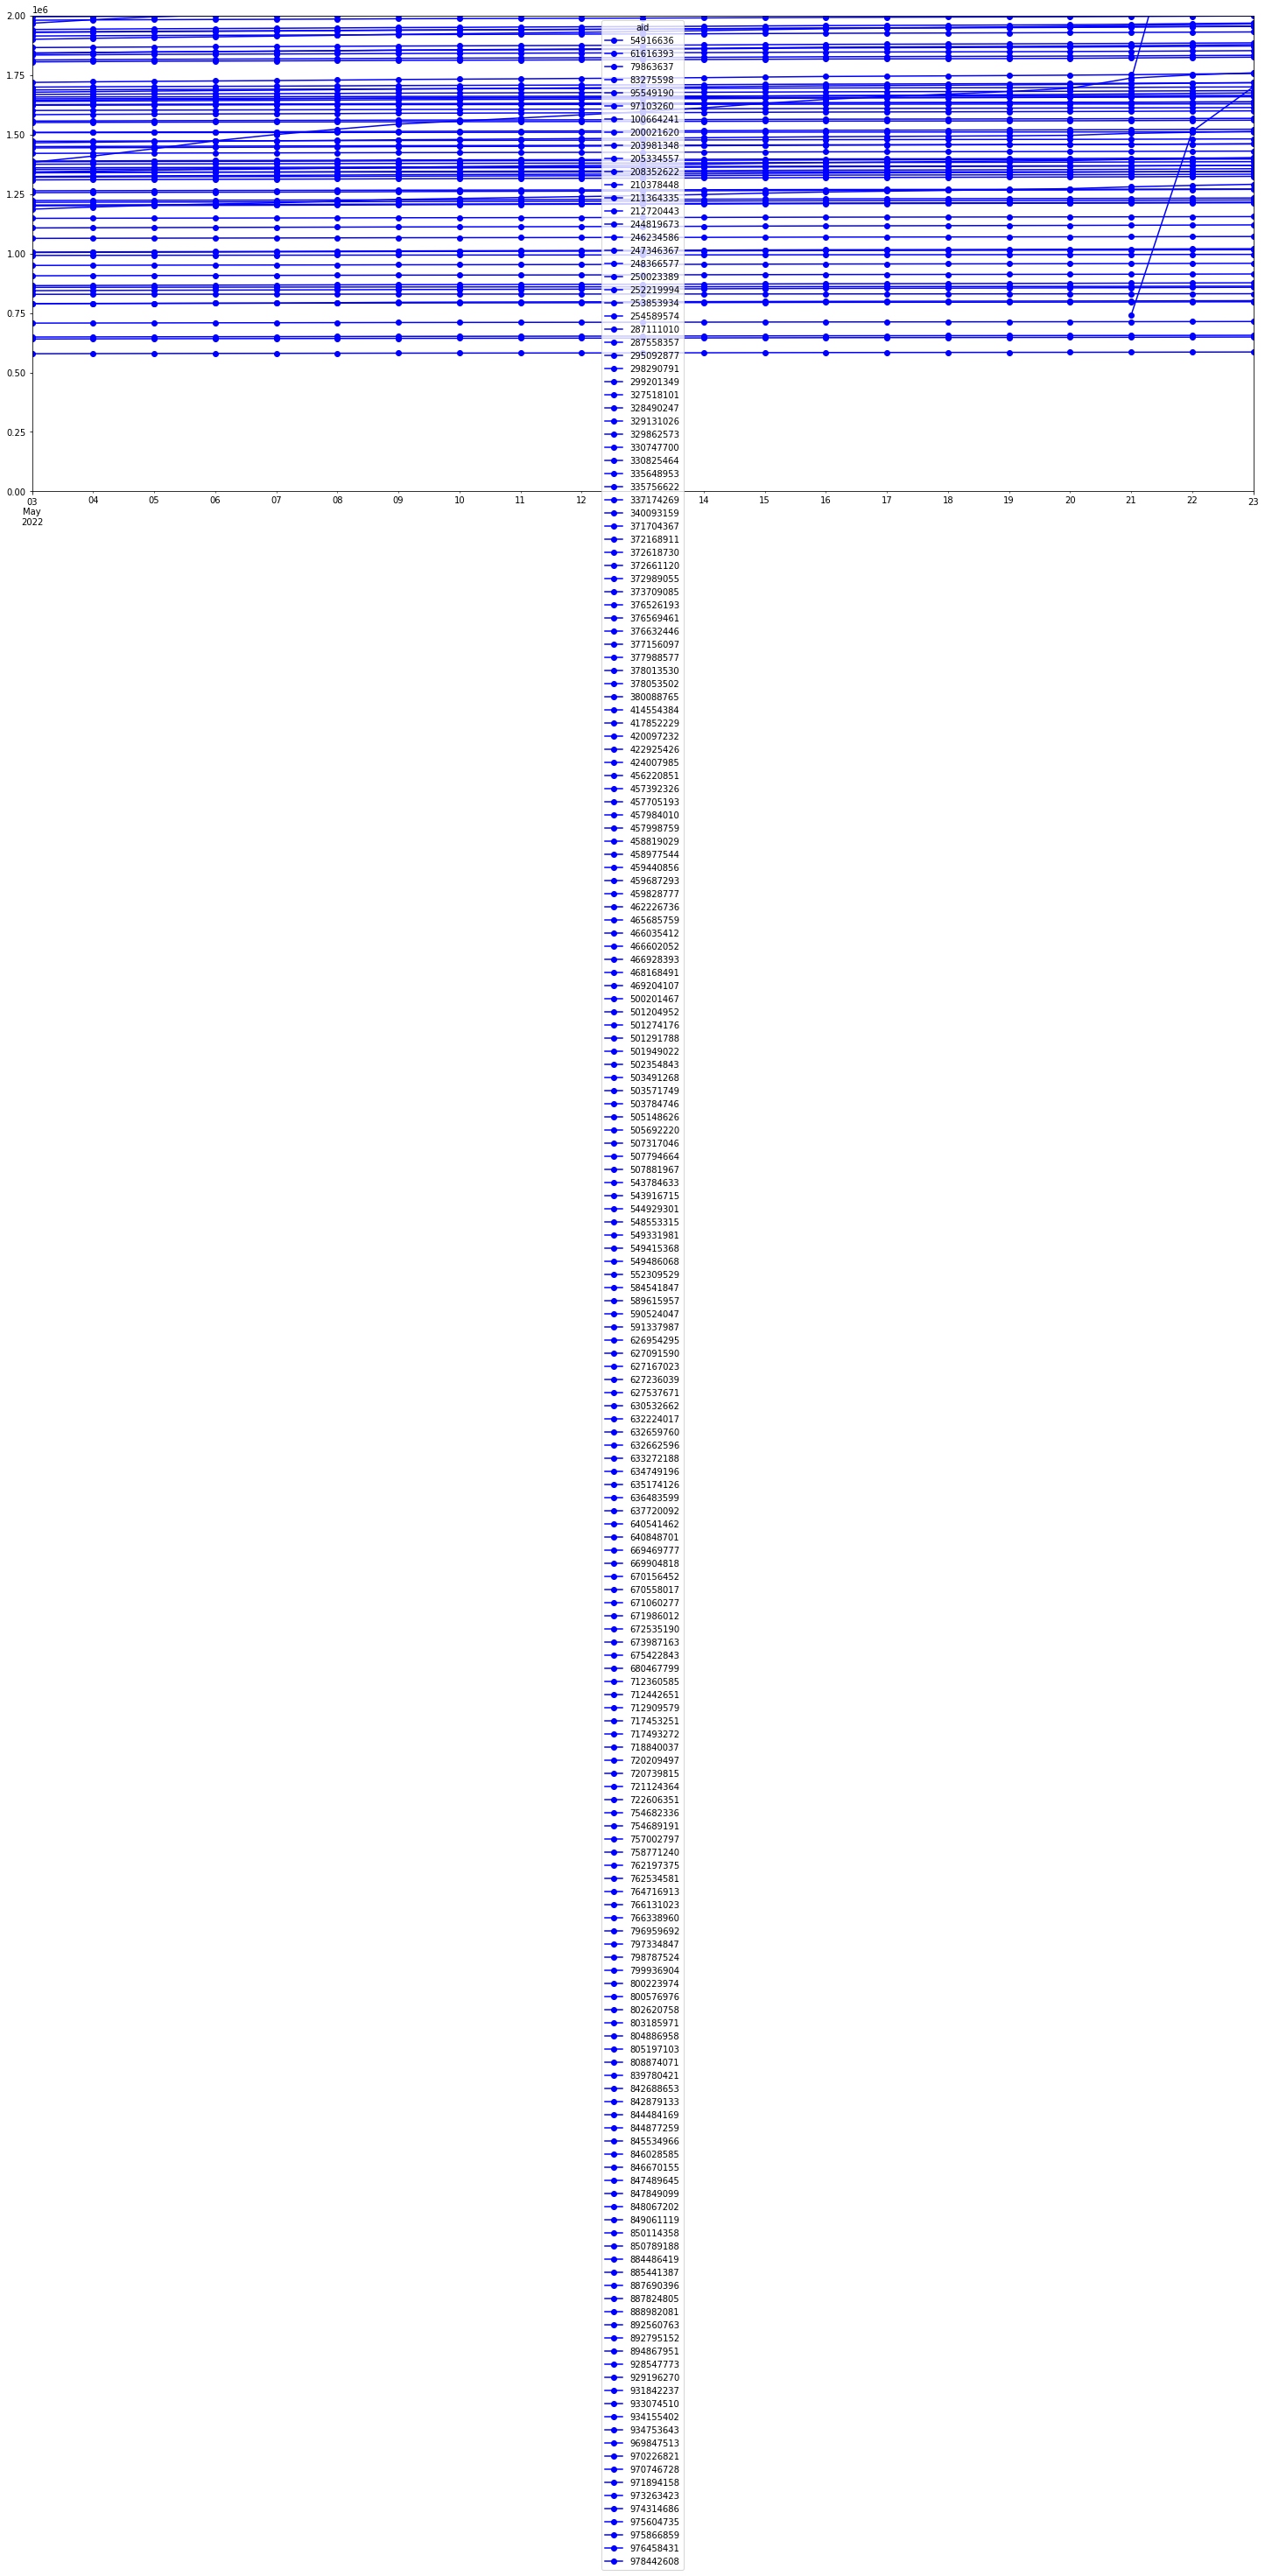

In [421]:
%matplotlib inline
videos_pd['play'].unstack()[temp].plot(figsize=(25, 10), style='ob-', ylim=(0, 2000000))

In [304]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=list('abcd'))
df

,a,b,c,d
0,-0.323218,1.064438,0.754792,0.707172
1,1.555955,-1.629892,0.856802,-0.449322
2,1.233741,-1.162421,0.193341,-2.031093
3,-1.770157,-0.288949,0.303517,-0.605067
4,0.181847,-0.404636,0.218294,-0.765806
...,...,...,...,...
995,-1.065546,0.052900,0.055660,1.495890
996,-1.474501,0.235912,0.243949,-2.130947
997,-0.216169,1.107985,-0.123594,0.643483
998,0.154011,1.563902,0.434081,-0.420990


In [305]:
df = df.cumsum()
df

,a,b,c,d
0,-0.323218,1.064438,0.754792,0.707172
1,1.232736,-0.565454,1.611594,0.257850
2,2.466477,-1.727875,1.804935,-1.773243
3,0.696320,-2.016824,2.108453,-2.378310
4,0.878167,-2.421460,2.326747,-3.144117
...,...,...,...,...
995,21.937907,-6.515790,25.519920,11.218680
996,20.463406,-6.279877,25.763869,9.087733
997,20.247237,-5.171892,25.640275,9.731216
998,20.401248,-3.607991,26.074356,9.310226


<AxesSubplot:>

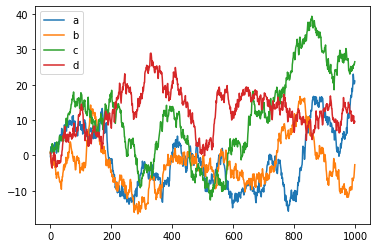

In [306]:
df.plot()

In [5]:
with open(f'{data_dir}/infos/20220512/videos.json') as f:
    videos_json = load(f)

In [24]:
videos_json[0]

{'comment': 16251,
 'typeid': 172,
 'play': 1582761,
 'pic': 'http://i2.hdslb.com/bfs/archive/a1fc830960e27d65e1865647fef202bafefb2ead.jpg',
 'subtitle': '',
 'description': "春日的花瓣吹落堇庭，若翩翩冰姿。\n林森的溪鸣间杂鸟啼，掩幽幽静思。\n\nShirasagi's\xa0Demeanor\xa0白鹭风仪\n\n作曲：Yu-Peng\xa0Chen\xa0陈致逸\n乐队配器：Yu-Peng\xa0Chen\xa0陈致逸\n独奏乐器：Shakuhachi:\xa0Mamino\xa0Yorita\xa0尺八：寄田\xa0真見乃\nKoto:\xa0Kasumi\xa0Watanabe\xa0筝：渡邊\xa0香澄\n乐队：International\xa0Master\xa0Philharmonic\xa0Orchestra\xa0国际首席爱乐乐团\n录音棚：Shangri-la\xa0Studio\nSo",
 'copyright': '1',
 'title': '《原神》EP - 白鹭儃伫之思',
 'review': 0,
 'author': '原神',
 'mid': 401742377,
 'created': 1650340800,
 'length': '04:17',
 'video_review': 16833,
 'aid': 640848701,
 'bvid': 'BV1nY4y1a76M',
 'hide_click': False,
 'is_pay': 0,
 'is_union_video': 0,
 'is_steins_gate': 0,
 'is_live_playback': 0}

In [25]:
a = pd.DataFrame(videos_json, columns=video_columns)
a.index = a['aid']
del a['aid']
a

,bvid,comment,typeid,play,description,title,author,mid,created,length,video_review
aid,,,,,,,,,,,
640848701,BV1nY4y1a76M,16251,172,1582761,春日的花瓣吹落堇庭，若翩翩冰姿。\n林森的溪鸣间杂鸟啼，掩幽幽静思。\n\nShirasag...,《原神》EP - 白鹭儃伫之思,原神,401742377,1650340800,04:17,16833
298290791,BV1ZF411g7EZ,50401,172,9003485,花开再艳，也终有一日须经受严冬的考验。\r\n但霜雪总有停时，寒木依然挺立。\r\n待云开雪...,《原神》PV短片——「雪霁逢椿」,原神,401742377,1650254431,12:57,88485
468168491,BV1M5411S7Lg,14793,172,2051115,昔时，稻妻有能诗者五人，留歌仙逸闻。几经曲折，风波伏定。\n今日，堇庭亦现才佳者五位，探荣采...,《原神》剧情PV-「歌仙逸话」,原神,401742377,1649844031,10:25,5376
640541462,BV1YY4y1H7wD,7969,172,1239220,「纯真的歌谣」Song of Innocence\n\n由上海乐团乐手与合唱团小朋友们录制，...,「纯真的歌谣」：《原神》稻妻篇OST2雾海纪行主题印象曲MV,原神,401742377,1649736000,03:06,3189
637720092,BV1BY4y1q7Ko,13380,172,1369886,神里绫人的剑术虚实相依，难以分辨，常令敌人产生能够轻易得手的错觉。\n只不过他们的这种美梦仅...,《原神》拾枝杂谈-「神里绫人：镜中花月」,原神,401742377,1648612800,05:18,6685
...,...,...,...,...,...,...,...,...,...,...,...
95549190,BV1iE411L7LJ,8099,65,1112980,旅行者！好久不见了，最近有好好锻炼身体，为新的冒险做准备吗？健康是完成挑战的首要条件，千万不...,《原神》「再临测试」前瞻，与安柏一同尽情观赏璃月风光！,原神,401742377,1583985647,05:41,6420
83275598,BV1MJ411H77i,13409,65,8146524,自蒙德向南而行，将抵达名为「璃月」的国度。七国最大的商港「璃月港」坐落海边。\n此地至今仍有...,《原神》新地区预告-「浮世浮生千岩间」,原神,401742377,1578985824,01:47,7503
79863637,BV1SJ411t7kb,5689,65,3156604,「璃月七星」中的「天权」，对璃月每一寸土地的秘密了若指掌。\n然而海上有一位「无冕的龙王」，...,《原神》全新角色预告-「天星不照之处」,原神,401742377,1576814447,00:59,2206
